In [ ]:
###start here

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, ZeroPadding2D, Dense, Activation, Dropout, Flatten, MaxPooling2D

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, roc_auc_score
import numpy as np
from sklearn.model_selection import KFold,StratifiedKFold

In [2]:
df=pd.read_csv('D:/rubbish/augmentation.csv', sep=',')

In [3]:
##remove row_i
df = df.drop(df.columns[0], axis=1)

In [4]:
#df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.columns[0]

'label'

In [6]:
label= df.iloc[: , 0]

In [7]:
label

0        0
1        0
2        0
3        0
4        0
        ..
15295    1
15296    1
15297    1
15298    1
15299    1
Name: label, Length: 15300, dtype: int64

In [8]:
df = df.drop(df.columns[0], axis=1)
df.shape

(15300, 4600)

In [9]:
#df = df.drop(df.columns[0], axis=1)
#df = df.iloc[1:]
df_ok= df.values.reshape(-1, 200, 23, 1)
df_ok.shape

(15300, 200, 23, 1)

In [10]:
label = label.to_numpy().astype('int32')
one_hot_targets = np.eye(2)[label.reshape(-1)]

In [11]:
df_ok = df_ok.astype('int32')

In [14]:
df_ok.shape

(15300, 200, 23, 1)

In [134]:
#one_hot_targets
#y_test1= np.argmax(one_hot_targets, axis=-1)


In [139]:
#X_train, X_test, y_train, y_test = train_test_split(df_ok, one_hot_targets, test_size=0.2, stratify= one_hot_targets)
X_train, X_test, y_train, y_test = train_test_split(df_ok, one_hot_targets, test_size=0.4, shuffle= False)

In [105]:
#list(y_test)[2600]

In [106]:
X_train, y_train= shuffle(X_train, y_train)

In [107]:
y_train.shape

(7650, 2)

In [108]:
#df_ok= df_ok/255

In [17]:
early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [18]:
def model_cyto():
    model = Sequential()
    model.add(ZeroPadding2D((5, 2), input_shape=(200, 23, 1)))
    # 1st Convolutional Layer
    model.add(Conv2D(filters=5, kernel_size=(3, 2), strides=(8, 1), padding="valid"))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

    # 2nd Convolutional Layer
    model.add(Conv2D(filters=5, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))
    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

    # 3rd Convolutional Layer
    model.add(Conv2D(filters=5, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

    # 4th Convolutional Layer
    model.add(Conv2D(filters=5, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
    model.add(Activation('relu'))

    # Max Pooling
    model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

    # Fully Connected layer
    model.add(Flatten())
    # 1st Fully Connected Layer
    model.add(Dense(5))
    model.add(Activation('relu'))
    # Add Dropout to prevent overfitting


    model.add(Dropout(0.3))

    # Output Layer
    # important to have dense 10, since we have 10 classes
    model.add(Dense(2))
    model.add(Activation('sigmoid'))

    #model.summary()

    model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])
    return model
#model.fit(df_ok, one_hot_targets, validation_split=0.3, epochs= 15 , callbacks=[early_stopping_monitor], shuffle=True)
#history= model.fit(X_train,y_train, validation_split=0.1, epochs=  5, callbacks=[early_stopping_monitor],shuffle=True).history

In [111]:
model_cyto().summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_10 (ZeroPaddi (None, 210, 27, 1)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 26, 26, 5)         35        
_________________________________________________________________
activation_60 (Activation)   (None, 26, 26, 5)         0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 24, 24, 5)         0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 22, 22, 5)         230       
_________________________________________________________________
activation_61 (Activation)   (None, 22, 22, 5)         0         
_________________________________________________________________
max_pooling2d_41 (MaxPooling (None, 20, 20, 5)       

In [112]:
history= model_cyto().fit(X_train,y_train, validation_split=0.1, epochs=  30, callbacks=[early_stopping_monitor],shuffle=True).history

Epoch 1/30
216/216 [==============================] - 8s 32ms/step - loss: 0.6820 - accuracy: 0.5622 - val_loss: 0.5740 - val_accuracy: 0.7098
Epoch 2/30
216/216 [==============================] - 7s 34ms/step - loss: 0.5807 - accuracy: 0.6900 - val_loss: 0.5664 - val_accuracy: 0.6719
Epoch 3/30
216/216 [==============================] - 7s 34ms/step - loss: 0.5294 - accuracy: 0.7088 - val_loss: 0.5024 - val_accuracy: 0.6928
Epoch 4/30
216/216 [==============================] - 8s 36ms/step - loss: 0.4648 - accuracy: 0.7390 - val_loss: 0.3760 - val_accuracy: 0.8235
Epoch 5/30
216/216 [==============================] - 8s 39ms/step - loss: 0.3769 - accuracy: 0.8257 - val_loss: 0.2609 - val_accuracy: 0.8993
Epoch 6/30
216/216 [==============================] - 8s 37ms/step - loss: 0.3110 - accuracy: 0.8666 - val_loss: 0.1960 - val_accuracy: 0.9190
Epoch 7/30
216/216 [==============================] - 8s 38ms/step - loss: 0.2748 - accuracy: 0.8792 - val_loss: 0.1749 - val_accuracy: 0.9229

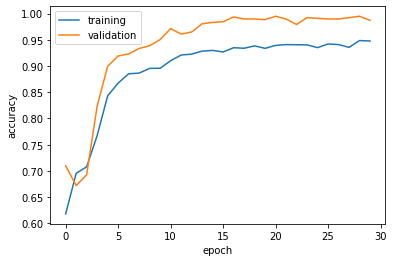

In [113]:
plt.plot(history['accuracy'], label="training")
plt.plot(history['val_accuracy'], label= "validation")
plt.xlabel('epoch') 
plt.ylabel('accuracy') 
plt.legend(loc="upper left")

In [114]:
y_pred = model.predict(X_test)
y_pred= np.argmax(y_pred, axis=-1)
y_test1= np.argmax(y_test, axis=-1)

print(metrics.accuracy_score(y_test1, y_pred))
confusion_matrix(y_test1, y_pred)
print(classification_report(y_test1, y_pred))

0.7860130718954248
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      4050
           1       0.73      0.87      0.79      3600

    accuracy                           0.79      7650
   macro avg       0.80      0.79      0.79      7650
weighted avg       0.80      0.79      0.79      7650



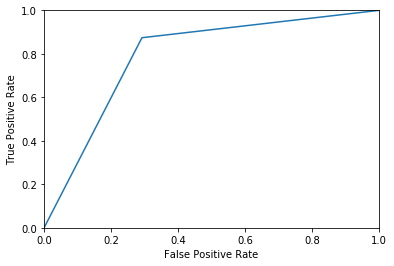

In [115]:
#y_pred = model.predict(X_test)
y_test_new1= np.array(y_test1)
y_pred_new1= np.array(y_pred)
fpr, tpr, thresholds_keras = roc_curve(y_test1, y_pred)


def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve (fpr,tpr) 
auc_score=roc_auc_score(y_test1,y_pred)

In [116]:
print(auc_score)

0.7909104938271604


In [29]:
model.save("D:/models_jawad/model_mut_vs_unmut_no_resnet.h5")

In [21]:
input1 = tf.keras.layers.Input(shape=(200, 23, 1))
x1= tf.keras.layers.ZeroPadding2D(padding=(5, 2))(input1)
#x1 = tf.keras.layers.Dense(32, activation='relu')(input1)
x1= tf.keras.layers.Conv2D(5, (3, 2), activation='relu',strides=(8, 1), padding="valid")(x1)
x5=x1
x1 = tf.keras.layers.Conv2D(1, (10,10), activation='relu', strides=(1, 1), padding="same")(x1)
x1= tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x1)
x1 = tf.keras.layers.Add()([x1, x5])
x2=x1
x1 = tf.keras.layers.Conv2D(5, (10, 10),activation='relu', strides=(1, 1), padding="same")(x1)
x1 = tf.keras.layers.Conv2D(1, (10, 10), activation='relu', strides=(1, 1), padding="same")(x1)
x1= tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x1)
x1 = tf.keras.layers.Add()([x1, x2])
x2=x1
x1 = tf.keras.layers.Conv2D(5, (10, 10), activation='relu', strides=(1, 1), padding="same")(x1)
x1 = tf.keras.layers.Conv2D(1, (10, 10), activation='relu', strides=(1, 1), padding="same")(x1)
x1= tf.keras.layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x1)
x1 = tf.keras.layers.Add()([x1, x2])
x1= tf.keras.layers.Flatten()(x1)
#1 = tf.keras.layers.Dense(10, activation='sigmoid')(x1)
x1= tf.keras.layers.Dropout(0.1)(x1)
x1 = tf.keras.layers.Dense(2, activation='sigmoid')(x1)
model = tf.keras.models.Model(inputs= input1, outputs=x1)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])
es = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=13,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

In [22]:
history= model.fit(X_train, y_train, epochs=30, callbacks=[es], validation_split=0.1, batch_size=10, shuffle=True).history

Epoch 1/30
605/605 [==============================] - 91s 148ms/step - loss: 0.5458 - accuracy: 0.7350 - val_loss: 0.2518 - val_accuracy: 0.8914
Epoch 2/30
605/605 [==============================] - 93s 154ms/step - loss: 0.1696 - accuracy: 0.9474 - val_loss: 0.1082 - val_accuracy: 0.9539
Epoch 3/30
605/605 [==============================] - 93s 153ms/step - loss: 0.0507 - accuracy: 0.9862 - val_loss: 0.0976 - val_accuracy: 0.9598
Epoch 4/30
605/605 [==============================] - 100s 165ms/step - loss: 0.0546 - accuracy: 0.9807 - val_loss: 0.0146 - val_accuracy: 0.9970
Epoch 5/30
605/605 [==============================] - 93s 154ms/step - loss: 0.0313 - accuracy: 0.9913 - val_loss: 0.0182 - val_accuracy: 0.9985
Epoch 6/30
605/605 [==============================] - 94s 155ms/step - loss: 0.0169 - accuracy: 0.9960 - val_loss: 0.0189 - val_accuracy: 0.9911
Epoch 7/30
605/605 [==============================] - 102s 169ms/step - loss: 0.0141 - accuracy: 0.9969 - val_loss: 0.0138 - val_

In [23]:
y_pred = model.predict(X_test)
y_pred= np.argmax(y_pred, axis=-1)
y_test1= np.argmax(y_test, axis=-1)

print(metrics.accuracy_score(y_test1, y_pred))
confusion_matrix(y_test1, y_pred)
print(classification_report(y_test1, y_pred))

0.6791666666666667
              precision    recall  f1-score   support

           0       0.56      0.99      0.71       680
           1       0.99      0.47      0.63      1000

    accuracy                           0.68      1680
   macro avg       0.77      0.73      0.67      1680
weighted avg       0.82      0.68      0.67      1680



In [24]:
model.save("D:/models_jawad/model_mut_vs_unmut_no_resnet1.h5")

In [43]:
######prediction

In [44]:
#model = keras.models.load_model('D:/models_jawad/model_mut_vs_unmut_no_resnet1.h5')
#model.save("D:/models_jawad/model_mut_vs_unmut_no_resnet1.h5")

In [91]:

df1=pd.read_csv('D:/rubbish/test_this.csv', sep=',')
df1 = df1.drop(df1.columns[0], axis=1)
df_ok1= df1.values.reshape(-1, 200, 23, 1)
df_ok1.shape
df_ok1 = df_ok1.astype('int32')

In [92]:
y_pred1= model.predict(df_ok1)

In [93]:
y_pred1= np.argmax(y_pred1, axis=-1)

In [94]:
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [95]:
y_pred1[200:220]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int64)

In [33]:
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=32, input_shape=(200, 23, 1), kernel_size=(3, 2), strides=(8, 1), padding="same"))


model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

# 2nd Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))
# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(1, 1), padding='valid'))

# 3rd Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))

# 4th Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), padding='valid'))
model.add(Activation('relu'))

# Max Pooling
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2), padding='valid'))

# Fully Connected layer
model.add(Flatten())
# 1st Fully Connected Layer
model.add(Dense(512))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting


model.add(Dropout(0.3))

# Output Layer
# important to have dense 10, since we have 10 classes
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

# Compile the model
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

history= model.fit(df_image, one_hot_targets, validation_split=0.3, epochs= 15 , callbacks=[early_stopping_monitor]).history



TypeError: The added layer must be an instance of class Layer. Found: <keras.layers.core.Activation object at 0x0000022860E17808>

In [36]:
import numpy as np
from sklearn.model_selection import KFold,StratifiedKFold

In [82]:
X = np.array([
    [1,2,3,4],
    [11,12,13,14],
    [21,22,23,24],
    [31,32,33,34],
    [41,42,43,44],
    [51,52,53,54],
    [61,62,63,64],
    [71,72,73,74]
])

y = np.array([0,0,0,0,1,1,1,1])

In [83]:
sfolder = StratifiedKFold(n_splits=4,shuffle=False)

In [84]:
print(sfolder)

StratifiedKFold(n_splits=4, random_state=None, shuffle=False)


In [85]:
j= sfolder.split(X,y)

In [86]:
print(j)

<generator object _BaseKFold.split at 0x0000018DBEC6FC48>


In [87]:
for train, test in sfolder.split(X,y):
    print('Train: %s | test: %s' % (train, test))
print("StratifiedKFold done")

Train: [1 2 3 5 6 7] | test: [0 4]
Train: [0 2 3 4 6 7] | test: [1 5]
Train: [0 1 3 4 5 7] | test: [2 6]
Train: [0 1 2 4 5 6] | test: [3 7]
StratifiedKFold done


In [141]:
floder = KFold(n_splits=5,shuffle=False)
for train, test in floder.split(X,y):
    train = shuffle(train)
    print('Train: %s | test: %s  ytest: %s' % (train, test, y[test]))
print("KFold done")

Train: [15114  6158 12867 ...  6335 14284  8253] | test: [   0    1    2 ... 3057 3058 3059]  ytest: [0 0 0 ... 1 1 1]
Train: [6476 8672 8409 ... 8897 1837 6712] | test: [3060 3061 3062 ... 6117 6118 6119]  ytest: [1 1 1 ... 1 1 1]
Train: [14119  2108   113 ... 13275 14527 10223] | test: [6120 6121 6122 ... 9177 9178 9179]  ytest: [1 1 1 ... 0 0 0]
Train: [ 2957 15125  1034 ...  6203 13741  5608] | test: [ 9180  9181  9182 ... 12237 12238 12239]  ytest: [0 0 0 ... 0 0 0]
Train: [2844 1223 2583 ... 1798 7813 7149] | test: [12240 12241 12242 ... 15297 15298 15299]  ytest: [0 0 0 ... 1 1 1]
KFold done


In [95]:
y[test].shape

(7650, 2)

In [39]:
df_ok[X_test].shape

(3060, 200, 23, 1)

In [22]:
df_ok.shape

(15300, 200, 23, 1)

In [23]:
one_hot_targets.shape

(15300, 2)

In [24]:
df_ok1= df.values.reshape(-1, 200, 23)
df_ok1.shape

(15300, 200, 23)

In [27]:
15300-12240

3060

In [48]:
floder = KFold(n_splits=10,shuffle=False)
X=df_ok
y=one_hot_targets
final=[]
for X_train, X_test in floder.split(X, y):
    X_train = shuffle(X_train)
    #y[X_train]= np.eye(2)[y[X_train].reshape(-1)]
    model_cyto().fit(X[X_train],y[X_train], epochs= 10, validation_split=0.1, callbacks=[early_stopping_monitor],shuffle=True)
    y_pred = model_cyto().predict(X[X_test])
    y_pred= np.argmax(y_pred, axis=-1)
    #y[X_test]= np.eye(2)[y[X_test].reshape(-1)]
    y_test1= np.argmax(y[X_test], axis=-1)

    res= metrics.accuracy_score(y_test1, y_pred)
    final.append(res)
    print("number: %s"  %(res))
print(final)
#sum(final)

Epoch 1/10
388/388 [==============================] - 18s 44ms/step - loss: 0.6852 - accuracy: 0.5146 - val_loss: 0.6230 - val_accuracy: 0.6500
Epoch 2/10
388/388 [==============================] - 17s 44ms/step - loss: 0.6085 - accuracy: 0.6484 - val_loss: 0.5529 - val_accuracy: 0.7175
Epoch 3/10
388/388 [==============================] - 18s 47ms/step - loss: 0.5540 - accuracy: 0.6797 - val_loss: 0.4384 - val_accuracy: 0.8228
Epoch 4/10
388/388 [==============================] - 19s 48ms/step - loss: 0.4954 - accuracy: 0.7439 - val_loss: 0.3776 - val_accuracy: 0.8693
Epoch 5/10
388/388 [==============================] - 17s 45ms/step - loss: 0.4743 - accuracy: 0.7660 - val_loss: 0.3304 - val_accuracy: 0.8882
Epoch 6/10
388/388 [==============================] - 20s 53ms/step - loss: 0.3695 - accuracy: 0.8558 - val_loss: 0.2813 - val_accuracy: 0.9092
Epoch 7/10
388/388 [==============================] - 18s 46ms/step - loss: 0.3416 - accuracy: 0.8661 - val_loss: 0.2540 - val_accuracy:

388/388 [==============================] - 18s 47ms/step - loss: 0.2771 - accuracy: 0.8416 - val_loss: 0.2096 - val_accuracy: 0.8889
Epoch 7/10
388/388 [==============================] - 16s 40ms/step - loss: 0.2600 - accuracy: 0.8434 - val_loss: 0.2358 - val_accuracy: 0.8620
Epoch 8/10
388/388 [==============================] - 15s 40ms/step - loss: 0.2435 - accuracy: 0.8623 - val_loss: 0.1848 - val_accuracy: 0.9099
Epoch 9/10
388/388 [==============================] - 15s 40ms/step - loss: 0.2271 - accuracy: 0.8786 - val_loss: 0.1695 - val_accuracy: 0.9194
Epoch 10/10
388/388 [==============================] - 15s 40ms/step - loss: 0.2228 - accuracy: 0.8748 - val_loss: 0.1727 - val_accuracy: 0.9114
number: 0.48104575163398694
Epoch 1/10
388/388 [==============================] - 16s 40ms/step - loss: 0.6468 - accuracy: 0.6053 - val_loss: 0.4643 - val_accuracy: 0.7945
Epoch 2/10
388/388 [==============================] - 16s 40ms/step - loss: 0.4760 - accuracy: 0.7624 - val_loss: 0.37

In [47]:
final

[0.6098039215686275]

In [55]:
l=[]
l.append(10)
print(l)

[10]
